READ IN DATA AND NLTK BASICS

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

In [195]:
#read in data
file_path = 'Gift_Cards_5.json.gz'
df = pd.read_json(file_path, compression='gzip', lines=True)

In [196]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN


* overall - rating of the product
* verified -
* reviewTime : time of the review (raw)
* reviewerID: ID of the reviewer
* asin: ID of the product
* style: a disctionary of the product metadata
* reviewerName: name of the reviewer
* reviewText: text of the Review
* summary: summary of the review
* unixReviewTime: time of the review (unix time)
* vote: helpful votes of the review
* image: images that useres post after they have received the product


In [197]:
df.head(5)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2972 non-null   int64  
 1   verified        2972 non-null   bool   
 2   reviewTime      2972 non-null   object 
 3   reviewerID      2972 non-null   object 
 4   asin            2972 non-null   object 
 5   style           864 non-null    object 
 6   reviewerName    2972 non-null   object 
 7   reviewText      2966 non-null   object 
 8   summary         2972 non-null   object 
 9   unixReviewTime  2972 non-null   int64  
 10  vote            208 non-null    float64
 11  image           12 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 258.4+ KB


In [198]:
print(df.shape)
#dataset contains 2972 rows and 12 columns

(2972, 12)


In [199]:
df.describe()

,overall,unixReviewTime,vote
count,2972.000000,2.972000e+03,208.000000
mean,4.885262,1.476136e+09,5.158654
std,0.484660,3.379616e+07,7.366121
min,1.000000,1.327968e+09,2.000000
25%,5.000000,1.454890e+09,2.000000
50%,5.000000,1.482710e+09,3.000000
75%,5.000000,1.500271e+09,5.000000
max,5.000000,1.534896e+09,60.000000


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2972 non-null   int64  
 1   verified        2972 non-null   bool   
 2   reviewTime      2972 non-null   object 
 3   reviewerID      2972 non-null   object 
 4   asin            2972 non-null   object 
 5   style           864 non-null    object 
 6   reviewerName    2972 non-null   object 
 7   reviewText      2966 non-null   object 
 8   summary         2972 non-null   object 
 9   unixReviewTime  2972 non-null   int64  
 10  vote            208 non-null    float64
 11  image           12 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 258.4+ KB


In [201]:
unique_values_asin = df['asin'].nunique()

print("Unique values asin in the column:")
print(unique_values_asin)


Unique values asin in the column:
148


In [202]:
unique_values_reviewer = df['reviewerID'].nunique()

print("Unique values reviewerID in the column:")
print(unique_values_reviewer)


Unique values reviewerID in the column:
458


1A. Count, averages

In [203]:
df.count()

overall           2972
verified          2972
reviewTime        2972
reviewerID        2972
asin              2972
style              864
reviewerName      2972
reviewText        2966
summary           2972
unixReviewTime    2972
vote               208
image               12
dtype: int64

As can be seen, most of the reviews are 5 stars. Then it has a little uptick in the number of 1 star reviews so 'very biased' towards positive reviews

# 1.Dataset data exploration


In [204]:
# a. Counts, averages
df.describe()

,overall,unixReviewTime,vote
count,2972.000000,2.972000e+03,208.000000
mean,4.885262,1.476136e+09,5.158654
std,0.484660,3.379616e+07,7.366121
min,1.000000,1.327968e+09,2.000000
25%,5.000000,1.454890e+09,2.000000
50%,5.000000,1.482710e+09,3.000000
75%,5.000000,1.500271e+09,5.000000
max,5.000000,1.534896e+09,60.000000


In [205]:
# b. Distribution of the number of reviews across products
reviews_across_products = len(df['overall'])
print(f"The number of reviews across products: {reviews_across_products}")

The number of reviews across products: 2972


In [206]:
df['overall'].value_counts().sort_index()

1      22
2      11
3      33
4     154
5    2752
Name: overall, dtype: int64

[]

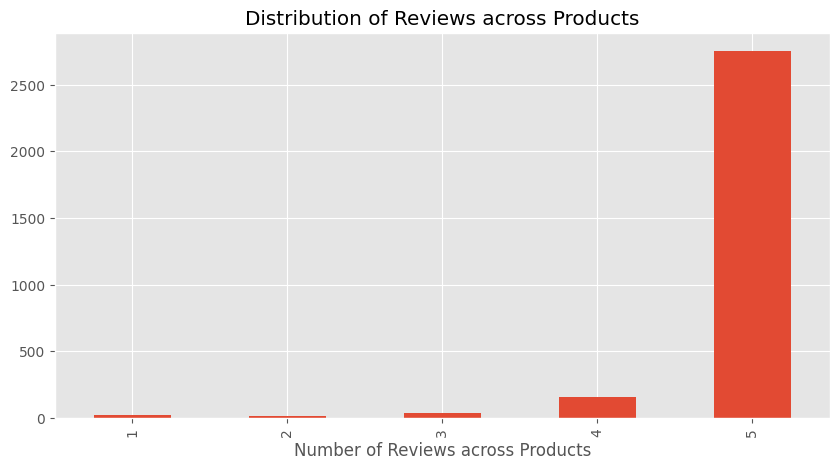

In [207]:
plot_reviews_across_products_bar = df['overall'].value_counts().sort_index().plot(kind='bar',
                                               title='Distribution of Reviews across Products',
                                               figsize=(10,5))
plot_reviews_across_products_bar.set_xlabel('Number of Reviews across Products')
plot_reviews_across_products_bar.plot()

[]

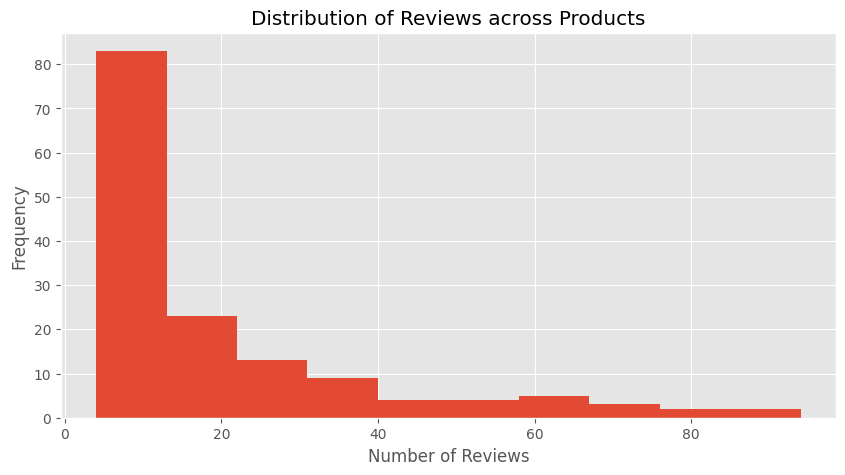

In [208]:
plot_reviews_across_products = df['asin'].value_counts().sort_index().plot(kind='hist',
                                               title='Distribution of Reviews across Products',
                                               figsize=(10,5))
plot_reviews_across_products.set_xlabel('Number of Reviews')
plot_reviews_across_products.plot()

In [209]:
# c. Distribution of the number of reviews per product
df['asin'].value_counts()

B00AR51Y5I    94
B004Q7CK9M    88
B0091JKVU0    84
B00BXLW5QC    79
B0091JKY0M    73
              ..
B016J1LGPG     5
B01CT5PHJ2     5
B00BXLSPGQ     5
B0188LOK7G     5
B01B25LU7S     4
Name: asin, Length: 148, dtype: int64

[]

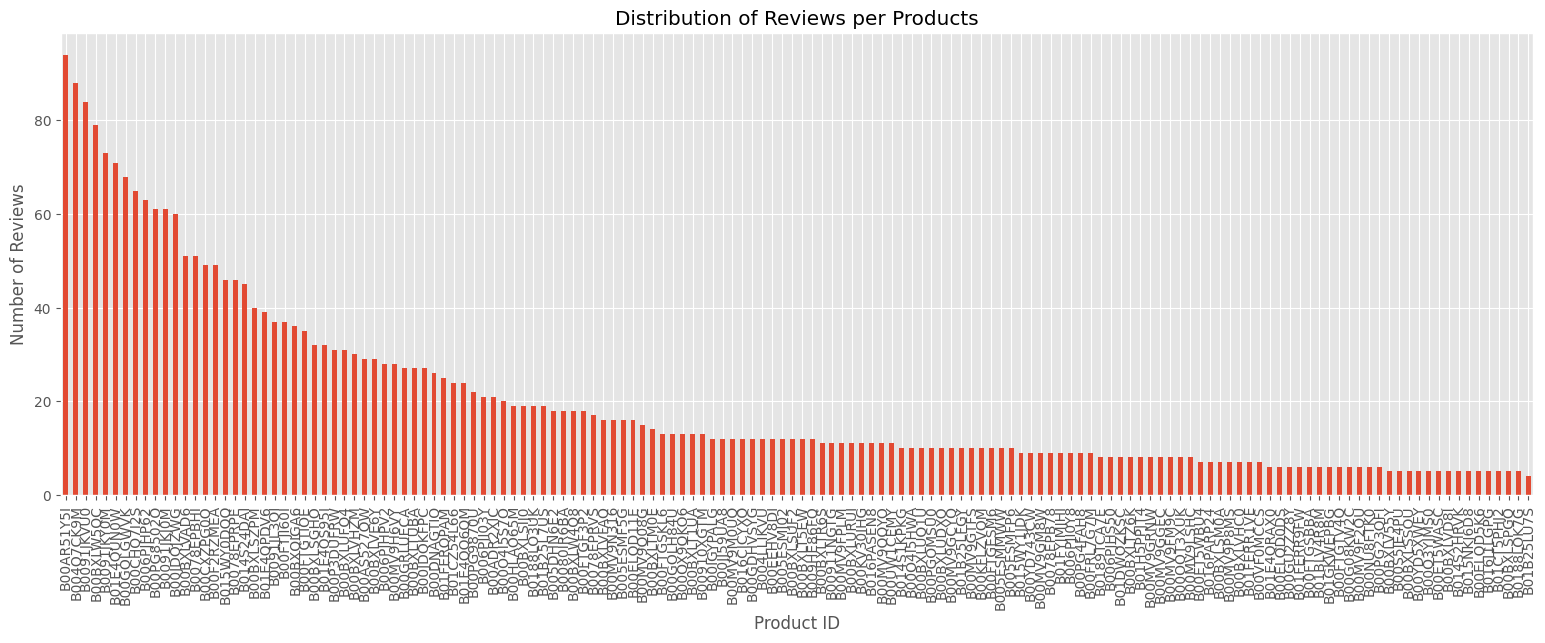

In [210]:
plot_reviews_per_product=df['asin'].value_counts().plot(kind='bar',
                               title='Distribution of Reviews per Products',
                               figsize=(19,6))
plot_reviews_per_product.set_xlabel('Product ID')
plot_reviews_per_product.set_ylabel("Number of Reviews")
plot_reviews_per_product.plot()

In [211]:
# d.Distribution of reviews per user
reviews_per_user = df['reviewerID'].value_counts()
print(reviews_per_user)



A1U1G73EI5IRZF    32
A13H0YP0J8PM6V    28
A3OHGWD8LIDZ8K    22
A2RTTRR421J9KG    19
A1SVYJFIASQ46Z    19
                  ..
ASJ7USDIR4PL0      5
A3OZ1Q3VI8H8EO     5
AIG7PZQOVH31T      5
A2M5PNYYFWSJMD     5
A2RV5MAIOHKMW0     5
Name: reviewerID, Length: 458, dtype: int64


[]

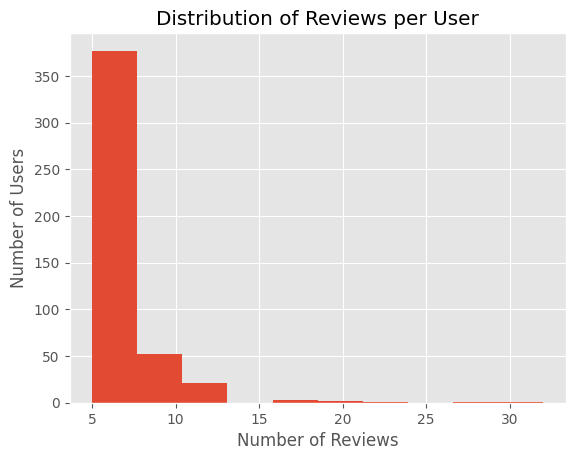

In [212]:
plot_reviews_per_user =reviews_per_user.plot(kind='hist', title='Distribution of Reviews per User')
plot_reviews_per_user.set_xlabel('Number of Reviews')
plot_reviews_per_user.set_ylabel('Number of Users')
plot_reviews_per_user.plot()



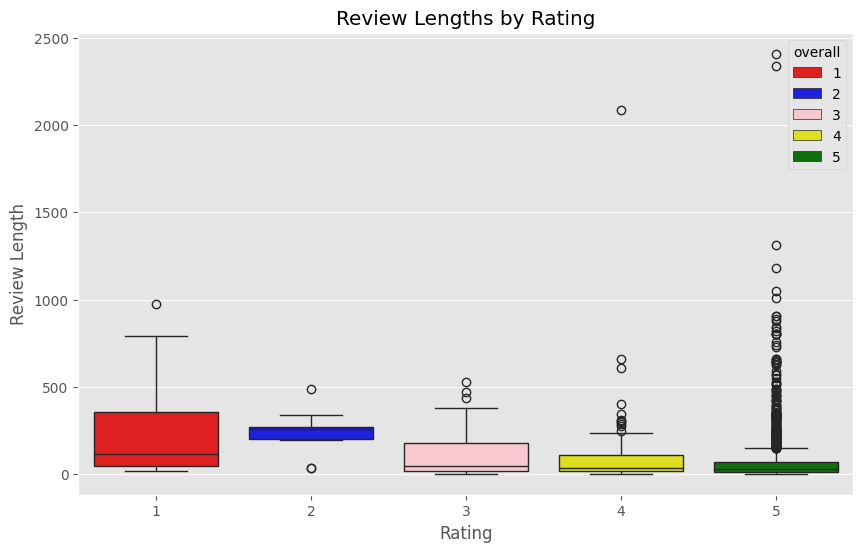

In [213]:
# e. Review lengths and outliers
df['review_length'] = df['reviewText'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.boxplot(x='overall', y='review_length', data=df, hue="overall", palette =['red','blue','pink','yellow','green'])
plt.title("Review Lengths by Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.show()

In [214]:
# f. Analyze lengths
review_length_stats = df['review_length'].describe()
print(review_length_stats)

count    2972.000000
mean       67.337147
std       131.020103
min         2.000000
25%        12.000000
50%        29.000000
75%        72.000000
max      2409.000000
Name: review_length, dtype: float64


In [215]:
# g. Check for duplicates

# Define the columns that uniquely identify a review
unique_cols = ['reviewerID', 'asin','reviewText', 'reviewTime']

# Find duplicates based on these unique columns. `keep=False` marks all duplicates as True.
duplicates = df[df.duplicated(subset=unique_cols)]

# Count the number of duplicates
num_duplicates = duplicates.count()

# Print the number of duplicates
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
style             0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
vote              0
image             0
review_length     0
dtype: int64


In [216]:
# g. Check for duplicates

# Define the columns that uniquely identify a review
unique_cols = ['reviewerID', 'asin','reviewText']

# Find duplicates based on these unique columns. `keep=False` marks all duplicates as True.
duplicates = df[df.duplicated(subset=unique_cols)]

# Count the number of duplicates
num_duplicates = duplicates.count()

# Print the number of duplicates
print(f"Number of duplicate rows: {num_duplicates}")
print(duplicates['reviewerID'])
print(duplicates['asin'])
print(duplicates['reviewText'])

df[(df['reviewerID']=='A2WCRWBZJETE17')&(df['asin']=='B004Q7CK9M')&(df['reviewText']=='Good gift for anyone')]

Number of duplicate rows: overall           1
verified          1
reviewTime        1
reviewerID        1
asin              1
style             1
reviewerName      1
reviewText        1
summary           1
unixReviewTime    1
vote              0
image             0
review_length     1
dtype: int64
79    A2WCRWBZJETE17
Name: reviewerID, dtype: object
79    B004Q7CK9M
Name: asin, dtype: object
79    Good gift for anyone
Name: reviewText, dtype: object


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_length
40,5,True,"01 14, 2017",A2WCRWBZJETE17,B004Q7CK9M,{'Gift Amount:': ' 50'},Jeff Quade,Good gift for anyone,five stars,1484352000,NaN,NaN,20
79,5,True,"08 8, 2014",A2WCRWBZJETE17,B004Q7CK9M,{'Gift Amount:': ' 50'},Jeff Quade,Good gift for anyone,Five Stars,1407456000,NaN,NaN,20


# 2. Text basic pre-processing:

In [217]:
#a. Label your data based on the value of “rating of the product”
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['overall'].apply(label_sentiment)

In [218]:
df['sentiment']

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
2967    Positive
2968    Positive
2969    Positive
2970    Positive
2971    Positive
Name: sentiment, Length: 2972, dtype: object

In [219]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

Positive    2906
Negative      33
Neutral       33
Name: sentiment, dtype: int64


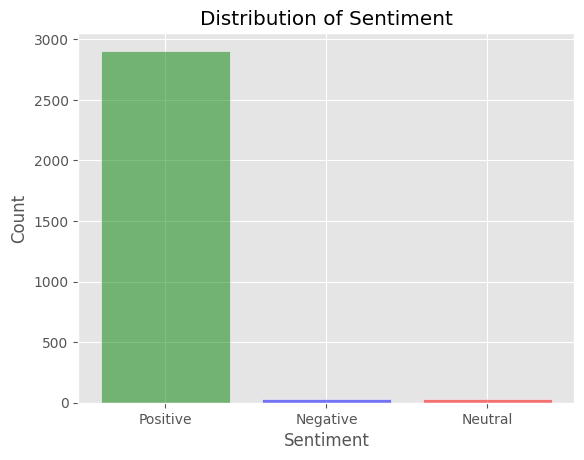

In [220]:
sns.histplot(data=df, x='sentiment', hue='sentiment', palette=['green', 'blue', 'red'], shrink=0.8, legend=False)

plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

b. Chose the appropriate columns for your sentiment analyzer

In [221]:
df.isnull().sum()

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style             2108
reviewerName         0
reviewText           6
summary              0
unixReviewTime       0
vote              2764
image             2960
review_length        0
sentiment            0
dtype: int64

As can be seen, STYLE, VOTE, IMAGE have a great amount of missing values.

In [222]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_length,sentiment
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN,19,Positive
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN,25,Positive
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN,12,Positive
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN,48,Positive
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN,15,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,5,True,"07 10, 2018",A1MXZ1CW0ZVTKL,B01DWOZKSC,NaN,Steve,"Not much to say, gift card is as good as cash!",gift card is as good as cash,1531180800,NaN,NaN,46,Positive
2968,4,True,"06 19, 2018",A1SVYJFIASQ46Z,B01DWOZKSC,NaN,Amazon Customer,Nice gift card,Four Stars,1529366400,NaN,NaN,14,Positive
2969,5,True,"06 8, 2018",A1QZ08NSDCZBA3,B01E4QS95I,NaN,Slickdome,Gift,Great Gift,1528416000,NaN,NaN,4,Positive
2970,5,True,"11 10, 2017",A1L4GG3FBMIG6V,B01FERR9FW,{'Gift Amount:': ' 250'},Amazon Customer,Pretty good!,Pretty good!,1510272000,NaN,NaN,12,Positive


In [223]:
# Create a new column "price"
df['price'] = df['style'].apply(lambda x: int(x.get('Gift Amount:', 0)) if isinstance(x, dict) else 0)
# Then now we can drop style column
df = df.drop(columns='style')
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_length,sentiment,price
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN,19,Positive,50
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN,25,Positive,50
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN,12,Positive,50
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN,48,Positive,50
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN,15,Positive,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,5,True,"07 10, 2018",A1MXZ1CW0ZVTKL,B01DWOZKSC,Steve,"Not much to say, gift card is as good as cash!",gift card is as good as cash,1531180800,NaN,NaN,46,Positive,0
2968,4,True,"06 19, 2018",A1SVYJFIASQ46Z,B01DWOZKSC,Amazon Customer,Nice gift card,Four Stars,1529366400,NaN,NaN,14,Positive,0
2969,5,True,"06 8, 2018",A1QZ08NSDCZBA3,B01E4QS95I,Slickdome,Gift,Great Gift,1528416000,NaN,NaN,4,Positive,0
2970,5,True,"11 10, 2017",A1L4GG3FBMIG6V,B01FERR9FW,Amazon Customer,Pretty good!,Pretty good!,1510272000,NaN,NaN,12,Positive,250


<ipython-input-224-2a4f71e2d5ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


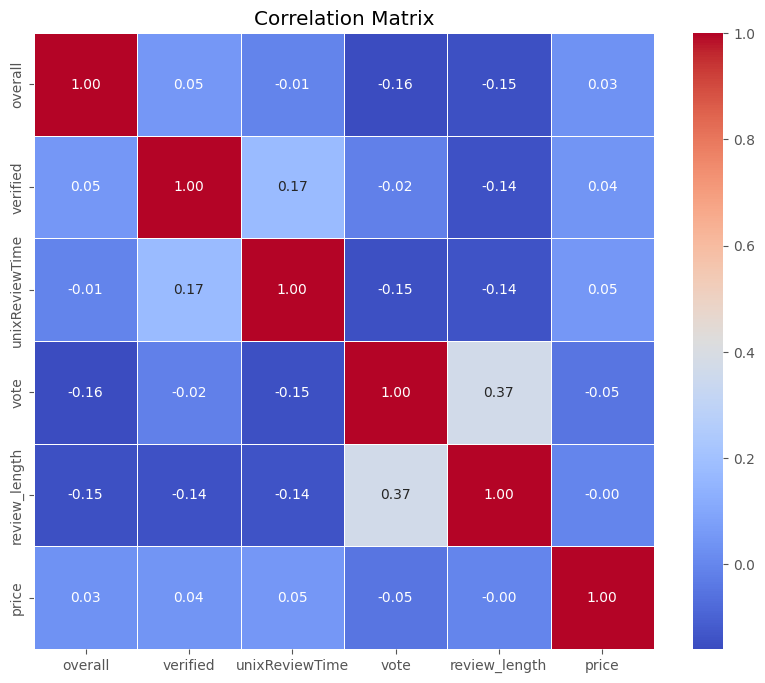

In [224]:
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

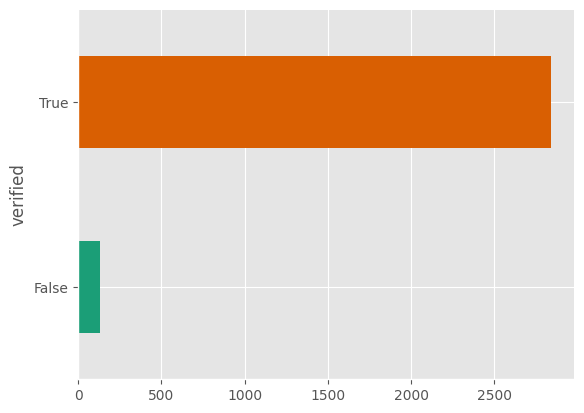

In [225]:
# check the verified column

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('verified').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

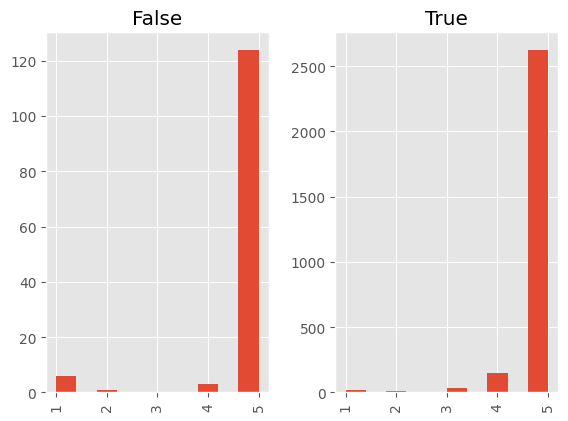

In [226]:
# Overall Rating by Verification Status

df.hist(column='overall', by='verified')

In [227]:
selected_cols = ['reviewText','summary','sentiment', 'overall', 'price','asin']
new_df = df[selected_cols]
new_df.head(3)

,reviewText,summary,sentiment,overall,price,asin
0,Another great gift.,Five Stars,Positive,5,50,B004LLIKVU
1,Gift card for my daughter,Ease of use,Positive,4,50,B004LLIKVU
2,Nice present,Five Stars,Positive,5,50,B004LLIKVU


There is not much difference in 2 bar charts, plus the correlation is weak, only 0.05, so we may drop verifed column

SINCE THIS IS A SENTIMENT ANALYSIS, WE WILL JUST FOCUS ON THE TEXT THEMSELVES. SO WE ONLY KEEP TEXT COLUMNS and overall and sentiment, OTHERS WILL BE DROPPED

In [228]:
#combine reviewText + summary into 1 col = text
new_df['text'] = new_df['reviewText'] + new_df['summary']
new_df

<ipython-input-228-444766459467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = new_df['reviewText'] + new_df['summary']


,reviewText,summary,sentiment,overall,price,asin,text
0,Another great gift.,Five Stars,Positive,5,50,B004LLIKVU,Another great gift.Five Stars
1,Gift card for my daughter,Ease of use,Positive,4,50,B004LLIKVU,Gift card for my daughterEase of use
2,Nice present,Five Stars,Positive,5,50,B004LLIKVU,Nice presentFive Stars
3,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,Positive,5,50,B004LLIKVU,My niece loved this birthday greeting/gift car...
4,fine as a gift.,Five Stars,Positive,5,50,B004LLIKVU,fine as a gift.Five Stars
...,...,...,...,...,...,...,...
2967,"Not much to say, gift card is as good as cash!",gift card is as good as cash,Positive,5,0,B01DWOZKSC,"Not much to say, gift card is as good as cash!..."
2968,Nice gift card,Four Stars,Positive,4,0,B01DWOZKSC,Nice gift cardFour Stars
2969,Gift,Great Gift,Positive,5,0,B01E4QS95I,GiftGreat Gift
2970,Pretty good!,Pretty good!,Positive,5,250,B01FERR9FW,Pretty good!Pretty good!


In [229]:
# then we can now drop reviewText + summary
new_df = new_df.drop(columns=['reviewText','summary'])

In [230]:
new_df

,sentiment,overall,price,asin,text
0,Positive,5,50,B004LLIKVU,Another great gift.Five Stars
1,Positive,4,50,B004LLIKVU,Gift card for my daughterEase of use
2,Positive,5,50,B004LLIKVU,Nice presentFive Stars
3,Positive,5,50,B004LLIKVU,My niece loved this birthday greeting/gift car...
4,Positive,5,50,B004LLIKVU,fine as a gift.Five Stars
...,...,...,...,...,...
2967,Positive,5,0,B01DWOZKSC,"Not much to say, gift card is as good as cash!..."
2968,Positive,4,0,B01DWOZKSC,Nice gift cardFour Stars
2969,Positive,5,0,B01E4QS95I,GiftGreat Gift
2970,Positive,5,250,B01FERR9FW,Pretty good!Pretty good!


In [231]:
# Calculate the length of each text
new_df['text_length'] = new_df['text'].str.len()
new_df['text_length'].describe()


count    2966.000000
mean       82.965947
std       138.026243
min         4.000000
25%        22.000000
50%        40.000000
75%        86.000000
max      2476.000000
Name: text_length, dtype: float64

In [232]:
new_df


,sentiment,overall,price,asin,text,text_length
0,Positive,5,50,B004LLIKVU,Another great gift.Five Stars,29.0
1,Positive,4,50,B004LLIKVU,Gift card for my daughterEase of use,36.0
2,Positive,5,50,B004LLIKVU,Nice presentFive Stars,22.0
3,Positive,5,50,B004LLIKVU,My niece loved this birthday greeting/gift car...,78.0
4,Positive,5,50,B004LLIKVU,fine as a gift.Five Stars,25.0
...,...,...,...,...,...,...
2967,Positive,5,0,B01DWOZKSC,"Not much to say, gift card is as good as cash!...",74.0
2968,Positive,4,0,B01DWOZKSC,Nice gift cardFour Stars,24.0
2969,Positive,5,0,B01E4QS95I,GiftGreat Gift,14.0
2970,Positive,5,250,B01FERR9FW,Pretty good!Pretty good!,24.0


In [233]:
#drop duplicates rows
new_df = new_df.drop_duplicates()
new_df

,sentiment,overall,price,asin,text,text_length
0,Positive,5,50,B004LLIKVU,Another great gift.Five Stars,29.0
1,Positive,4,50,B004LLIKVU,Gift card for my daughterEase of use,36.0
2,Positive,5,50,B004LLIKVU,Nice presentFive Stars,22.0
3,Positive,5,50,B004LLIKVU,My niece loved this birthday greeting/gift car...,78.0
4,Positive,5,50,B004LLIKVU,fine as a gift.Five Stars,25.0
...,...,...,...,...,...,...
2967,Positive,5,0,B01DWOZKSC,"Not much to say, gift card is as good as cash!...",74.0
2968,Positive,4,0,B01DWOZKSC,Nice gift cardFour Stars,24.0
2969,Positive,5,0,B01E4QS95I,GiftGreat Gift,14.0
2970,Positive,5,250,B01FERR9FW,Pretty good!Pretty good!,24.0


<ipython-input-234-a3ed13d06867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text_length'] = new_df['text'].apply(lambda x: len(str(x)))


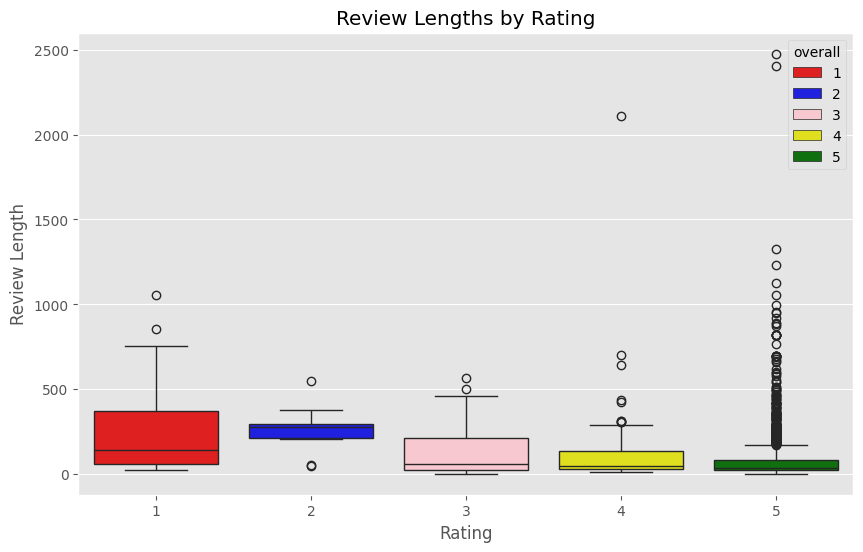

In [234]:
# e. Review lengths and outliers
new_df['text_length'] = new_df['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.boxplot(x='overall', y='text_length', data=new_df, hue="overall", palette=['red', 'blue', 'pink','yellow', 'green'])
plt.title("Review Lengths by Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.show()

# 3. Lexicons package choices

Here we're going to chooose VADER and TextBlob as our packages
1. VADER:
- It takes all the words in the sentence, which has value positive/negative/neutral for each word, then it combines up and does a math equation for all the words => Calculate how positive/negative/neutral is based on those words.
- It can handles Slangs as well as Emoticons
- Easy to use and doesn't require training data
- This does not account for relationships between words, which in human speech is important, but well it is a good start anyways.
2. TEXTBLOB
- Sentiment analysis feature provides polarity(positive/negative)
- Offers a simple API for common text processing tasks, such as POS, noun phrase extraction, and esp setiment analysis.
- Cannot handle slang and emojis/ emticons


# 4. Pre-process your text

- VADER doesnt required preprocessing

In [235]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# craete sentiment intensity analyzer object
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [236]:
new_df['Index'] = range(1, len(new_df) + 1)

<ipython-input-236-e3d1e39d0c95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Index'] = range(1, len(new_df) + 1)


In [237]:
new_df

,sentiment,overall,price,asin,text,text_length,Index
0,Positive,5,50,B004LLIKVU,Another great gift.Five Stars,29,1
1,Positive,4,50,B004LLIKVU,Gift card for my daughterEase of use,36,2
2,Positive,5,50,B004LLIKVU,Nice presentFive Stars,22,3
3,Positive,5,50,B004LLIKVU,My niece loved this birthday greeting/gift car...,78,4
4,Positive,5,50,B004LLIKVU,fine as a gift.Five Stars,25,5
...,...,...,...,...,...,...,...
2967,Positive,5,0,B01DWOZKSC,"Not much to say, gift card is as good as cash!...",74,2941
2968,Positive,4,0,B01DWOZKSC,Nice gift cardFour Stars,24,2942
2969,Positive,5,0,B01E4QS95I,GiftGreat Gift,14,2943
2970,Positive,5,250,B01FERR9FW,Pretty good!Pretty good!,24,2944


In [238]:
sia.polarity_scores('This is the best restaurant ever!')

{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6696}

In [239]:
sia.polarity_scores('This is the BEST restaurant EVER!')

{'neg': 0.0, 'neu': 0.489, 'pos': 0.511, 'compound': 0.7371}

In [240]:
sia.polarity_scores('This is the BEST restaurant EVER!!!')

{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7788}

In [241]:
sia.polarity_scores('This is the very BEST restaurant EVER!!!')

{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7965}

In [242]:
sia.polarity_scores('This is the very BEST restaurant EVER!!!, but no partio available')

{'neg': 0.177, 'neu': 0.57, 'pos': 0.253, 'compound': 0.2935}

- As can be seen, punctuattions and capitalization increases the intensity, which will affect to the Sentiment score, so no punctuations and capitalizations will be removed.
- Even the words 'very', 'but', 'no', which are included in stopwords list, had an affect on the Sentiment score, so no stopwords will be removed.
- Conjunctions (but) will not be removed also.


**TEXTBLOB PREPROCESSING**
- LowerCase: Convert the text data to lowercase to maintain consistency.
- Removing mention, URL links, hashtags as not important.
- Removing punctuation


In [243]:
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [244]:
new_df_blob = new_df.copy()
new_df_blob

,sentiment,overall,price,asin,text,text_length,Index
0,Positive,5,50,B004LLIKVU,Another great gift.Five Stars,29,1
1,Positive,4,50,B004LLIKVU,Gift card for my daughterEase of use,36,2
2,Positive,5,50,B004LLIKVU,Nice presentFive Stars,22,3
3,Positive,5,50,B004LLIKVU,My niece loved this birthday greeting/gift car...,78,4
4,Positive,5,50,B004LLIKVU,fine as a gift.Five Stars,25,5
...,...,...,...,...,...,...,...
2967,Positive,5,0,B01DWOZKSC,"Not much to say, gift card is as good as cash!...",74,2941
2968,Positive,4,0,B01DWOZKSC,Nice gift cardFour Stars,24,2942
2969,Positive,5,0,B01E4QS95I,GiftGreat Gift,14,2943
2970,Positive,5,250,B01FERR9FW,Pretty good!Pretty good!,24,2944


In [245]:
stop_words = set(stopwords.words('english'))
negations = {"not", "n't", "no","never", "don't", "isn't"}
custom_stopwords = stop_words - negations
#remove stop words except negations words like no not which can change the context

In [246]:
def preprocess_text(text):
    # Check if the text is a string
    if not isinstance(text, str):
        # Handle non-string inputs here. Options:
        # return an empty string, return the original input converted to string, etc.
        return ''  # or `return str(text)` to convert to string, but be cautious with 'nan' values


    text = text.lower()  # Convert to lowercase
    text = re.sub(r'https?://\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = text.translate(str.maketrans('','',string.punctuation))
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords while preserving negations
    words = [w for w in words if not w in custom_stopwords]
    # Rejoin words into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

new_df_blob['text'] = new_df_blob['text'].apply(preprocess_text)



# 5. Select randomly 1000 reviews from dataset

In [247]:
sampled_df = new_df.sample(n=1000, random_state=23)
sampled_df_blob = new_df_blob.sample(n=1000, random_state=23)


In [248]:
sampled_df_blob

,sentiment,overall,price,asin,text,text_length,Index
1173,Positive,5,0,B00BXLVE6Y,received gift card 20 lightning deal know many...,472,1164
927,Positive,5,0,B00BXLT5EW,great time w friendsfive stars,32,920
1377,Positive,5,75,B00CHQ7I2S,nice use every yearvery nice use every year,66,1364
388,Positive,5,0,B0078EPRPE,daughter loved five stars,52,386
145,Positive,5,0,B005ESMJ02,never go wrong gift cardfive stars,45,146
...,...,...,...,...,...,...,...
1663,Positive,5,0,B00FTGTIOE,wife absolutely loves starbucks allows load fu...,100,1646
2041,Positive,5,0,B00MV9GRNW,great emailed u instead waiting mail ive broug...,223,2022
1657,Positive,5,0,B00FTGTIOE,thanksgreat,11,1640
2608,Positive,5,0,B01BLV4R8M,great product great sellerfive stars,40,2584


# 6. Modeling Sentiment Analysis Lexicon approach

In [249]:
# run the polarity score on the entire dataset
result_vader={}
for i, row in tqdm(sampled_df.iterrows(), total=len(sampled_df)):
  text = str(row['text']) #convert all to string
  myid = row['Index']
  result_vader[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [250]:
result_vader

{1164: {'neg': 0.02, 'neu': 0.705, 'pos': 0.275, 'compound': 0.9825},
 920: {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249},
 1364: {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.7763},
 386: {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.6981},
 146: {'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'compound': 0.6656},
 2918: {'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'compound': 0.872},
 2071: {'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8519},
 1151: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 1070: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404},
 1004: {'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.8217},
 705: {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.9408},
 476: {'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.2382},
 2874: {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404},
 1204: {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404},
 2717: {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 

In [251]:
vaders = pd.DataFrame(result_vader).T


In [252]:
#merge into out dataframe
vaders = vaders.reset_index().rename(columns={'index':'Index'})
vaders = vaders.merge(sampled_df, how='left')

In [253]:
vaders

,Index,neg,neu,pos,compound,sentiment,overall,price,asin,text,text_length
0,1164,0.02,0.705,0.275,0.9825,Positive,5,0,B00BXLVE6Y,Received this gift card for $20 during a light...,472
1,920,0.00,0.494,0.506,0.6249,Positive,5,0,B00BXLT5EW,Great time w/ FriendsFive Stars,32
2,1364,0.00,0.571,0.429,0.7763,Positive,5,75,B00CHQ7I2S,Very nice! I use them every year.Very nice! I...,66
3,386,0.00,0.653,0.347,0.6981,Positive,5,0,B0078EPRPE,Was for my Daughter in which she Loved !!!Five...,52
4,146,0.00,0.524,0.476,0.6656,Positive,5,0,B005ESMJ02,You never go wrong with a gift cardFive Stars,45
...,...,...,...,...,...,...,...,...,...,...,...
995,1646,0.00,0.810,0.190,0.6115,Positive,5,0,B00FTGTIOE,My wife absolutely loves starbucks. This allo...,100
996,2022,0.00,0.673,0.327,0.9607,Positive,5,0,B00MV9GRNW,it was great to have it e-mailed to u. Instead...,223
997,1640,0.00,1.000,0.000,0.0000,Positive,5,0,B00FTGTIOE,thanksgreat,11
998,2584,0.00,0.328,0.672,0.8481,Positive,5,0,B01BLV4R8M,great product and great sellerFive Stars,40


Plot VADERS result

<ipython-input-254-502f31afc342>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_vaders =sns.barplot(data=vaders, x='overall', y = 'compound', palette=['red', 'blue', 'pink','yellow', 'green'])


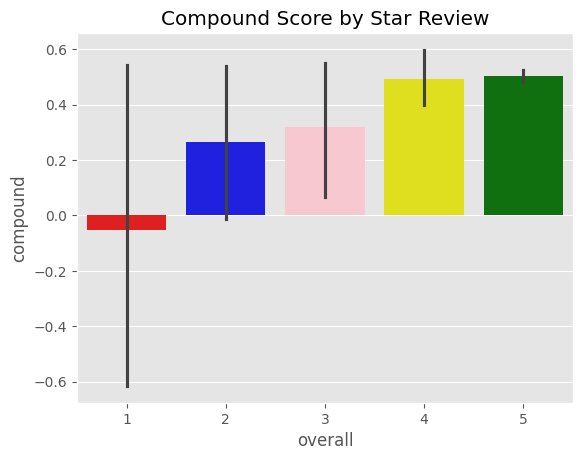

In [254]:
plot_vaders =sns.barplot(data=vaders, x='overall', y = 'compound', palette=['red', 'blue', 'pink','yellow', 'green'])
plot_vaders.set_title('Compound Score by Star Review')
plt.show()

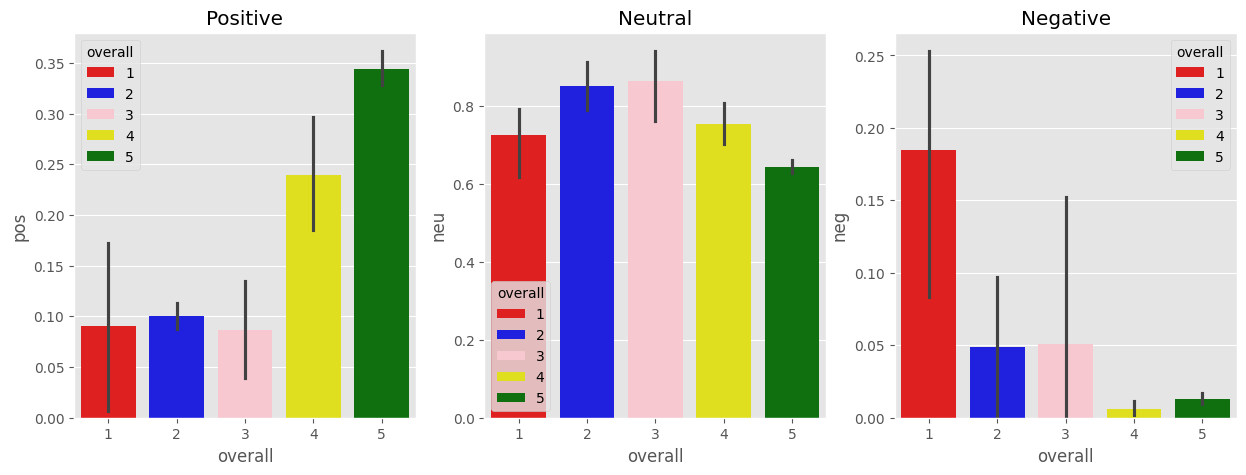

In [255]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='overall', y='pos', hue='overall', palette=['red', 'blue', 'pink','yellow', 'green'], ax = axs[0])
sns.barplot(data=vaders, x='overall', y='neu', hue='overall', palette=['red', 'blue', 'pink','yellow', 'green'], ax = axs[1])
sns.barplot(data=vaders, x='overall', y='neg', hue='overall', palette=['red', 'blue', 'pink','yellow', 'green'], ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

- As can be seen, positivity is higher as the score is higher in terms of stars
- Neutral kinda flat, not really
- Negative comes down

In [275]:
def get_sentiment_vader(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)
    compound = SentimentIntensityAnalyzer().polarity_scores(text)["compound"]
    if compound > 0.2 or compound == 0.0:
        return 'Positive'
    elif -0.1 <= compound <= 0.2:
        return 'Neutral'
    else:
        return 'Negative'

In [276]:
vaders['predicted_vaders'] = vaders['text'].apply(get_sentiment_vader)
vaders

,Index,neg,neu,pos,compound,sentiment,overall,price,asin,text,text_length,predicted_vaders
0,1164,0.02,0.705,0.275,0.9825,Positive,5,0,B00BXLVE6Y,Received this gift card for $20 during a light...,472,Positive
1,920,0.00,0.494,0.506,0.6249,Positive,5,0,B00BXLT5EW,Great time w/ FriendsFive Stars,32,Positive
2,1364,0.00,0.571,0.429,0.7763,Positive,5,75,B00CHQ7I2S,Very nice! I use them every year.Very nice! I...,66,Positive
3,386,0.00,0.653,0.347,0.6981,Positive,5,0,B0078EPRPE,Was for my Daughter in which she Loved !!!Five...,52,Positive
4,146,0.00,0.524,0.476,0.6656,Positive,5,0,B005ESMJ02,You never go wrong with a gift cardFive Stars,45,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1646,0.00,0.810,0.190,0.6115,Positive,5,0,B00FTGTIOE,My wife absolutely loves starbucks. This allo...,100,Positive
996,2022,0.00,0.673,0.327,0.9607,Positive,5,0,B00MV9GRNW,it was great to have it e-mailed to u. Instead...,223,Positive
997,1640,0.00,1.000,0.000,0.0000,Positive,5,0,B00FTGTIOE,thanksgreat,11,Positive
998,2584,0.00,0.328,0.672,0.8481,Positive,5,0,B01BLV4R8M,great product and great sellerFive Stars,40,Positive


Positive    970
Negative     22
Neutral       8
Name: predicted_vaders, dtype: int64


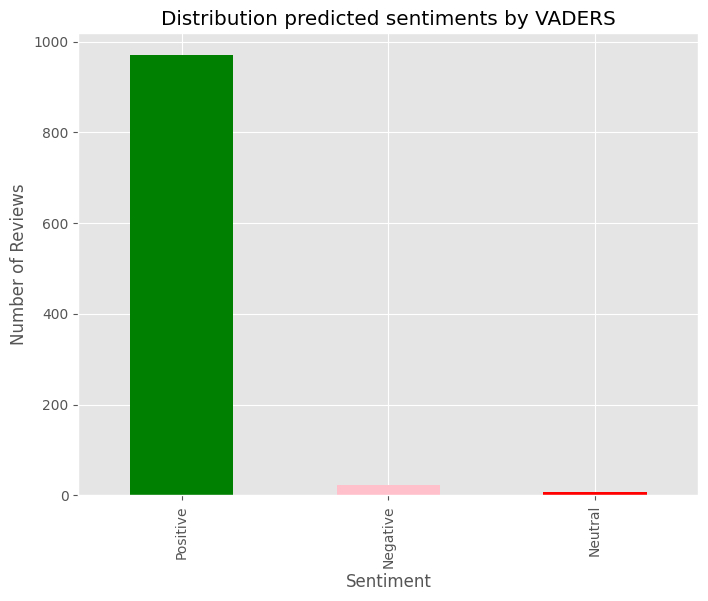

In [277]:
#sentiments predicted textblob plots
sentiment_counts_vaders = vaders['predicted_vaders'].value_counts()
print(sentiment_counts_vaders)

plt.figure(figsize=(8, 6))
sentiment_counts_vaders.plot(kind='bar', color=['green', 'pink', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution predicted sentiments by VADERS')
plt.show()

TEXTBLOB

In [257]:
from textblob import TextBlob

In [258]:
# Assuming 'preprocessed_text' is a list of pre-processed reviews
vader_scores= {}
vader_scores = [sia.polarity_scores(text) for text in sampled_df_blob]
vader_scores

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]

In [259]:
result_textblob = {}

for i, row in tqdm(sampled_df_blob.iterrows(), total=sampled_df_blob.shape[0]):
    text = str(row['text'])
    myid = row['Index']
    sentiment = TextBlob(text).sentiment
    result_textblob[myid] = sentiment

  0%|          | 0/1000 [00:00<?, ?it/s]

In [260]:
result_textblob

{1164: Sentiment(polarity=0.1319642857142857, subjectivity=0.44714285714285706),
 920: Sentiment(polarity=0.8, subjectivity=0.75),
 1364: Sentiment(polarity=0.6, subjectivity=1.0),
 386: Sentiment(polarity=0.7, subjectivity=0.8),
 146: Sentiment(polarity=-0.5, subjectivity=0.9),
 2918: Sentiment(polarity=0.8, subjectivity=0.75),
 2071: Sentiment(polarity=0.23333333333333336, subjectivity=0.7666666666666666),
 1151: Sentiment(polarity=0.0, subjectivity=0.0),
 1070: Sentiment(polarity=0.0, subjectivity=0.0),
 1004: Sentiment(polarity=0.8, subjectivity=0.75),
 705: Sentiment(polarity=0.12812500000000002, subjectivity=0.43124999999999997),
 476: Sentiment(polarity=0.0, subjectivity=0.0),
 2874: Sentiment(polarity=0.0, subjectivity=0.0),
 1204: Sentiment(polarity=0.0, subjectivity=0.0),
 2717: Sentiment(polarity=0.0, subjectivity=0.0),
 966: Sentiment(polarity=0.6, subjectivity=0.35000000000000003),
 47: Sentiment(polarity=0.5, subjectivity=0.7),
 691: Sentiment(polarity=0.5, subjectivity=1

In [261]:
blob = pd.DataFrame(result_textblob).T


In [262]:
#merge into out dataframe
blob = blob.reset_index().rename(columns={'index':'Index'})
blob = blob.merge(sampled_df_blob, how='left')

In [263]:
blob.head(2)

,Index,0,1,sentiment,overall,price,asin,text,text_length
0,1164,0.131964,0.447143,Positive,5,0,B00BXLVE6Y,received gift card 20 lightning deal know many...,472
1,920,0.800000,0.750000,Positive,5,0,B00BXLT5EW,great time w friendsfive stars,32


In [264]:
blob.rename(columns={0: 'polarity', 1: 'subjectivity'}, inplace=True)

In [265]:
blob

,Index,polarity,subjectivity,sentiment,overall,price,asin,text,text_length
0,1164,0.131964,0.447143,Positive,5,0,B00BXLVE6Y,received gift card 20 lightning deal know many...,472
1,920,0.800000,0.750000,Positive,5,0,B00BXLT5EW,great time w friendsfive stars,32
2,1364,0.600000,1.000000,Positive,5,75,B00CHQ7I2S,nice use every yearvery nice use every year,66
3,386,0.700000,0.800000,Positive,5,0,B0078EPRPE,daughter loved five stars,52
4,146,-0.500000,0.900000,Positive,5,0,B005ESMJ02,never go wrong gift cardfive stars,45
...,...,...,...,...,...,...,...,...,...
995,1646,0.200000,0.900000,Positive,5,0,B00FTGTIOE,wife absolutely loves starbucks allows load fu...,100
996,2022,0.800000,0.750000,Positive,5,0,B00MV9GRNW,great emailed u instead waiting mail ive broug...,223
997,1640,0.000000,0.000000,Positive,5,0,B00FTGTIOE,thanksgreat,11
998,2584,0.800000,0.750000,Positive,5,0,B01BLV4R8M,great product great sellerfive stars,40


PLOT TEXTBLOB RESULTS

<ipython-input-266-614169e34f5e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_blob =sns.barplot(data=blob, x='overall', y = 'polarity', palette=['red', 'blue', 'pink','yellow', 'green'])


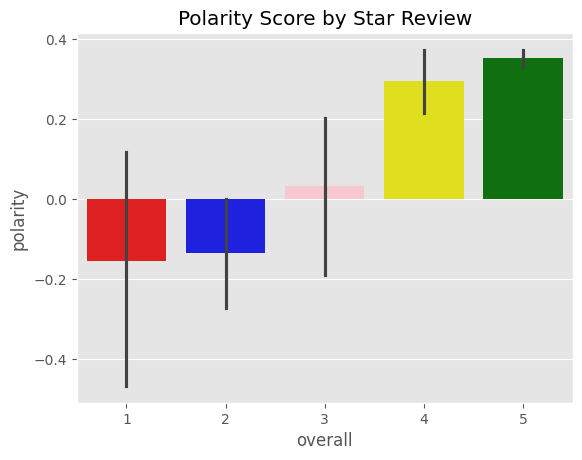

In [266]:
plot_blob =sns.barplot(data=blob, x='overall', y = 'polarity', palette=['red', 'blue', 'pink','yellow', 'green'])
plot_blob.set_title('Polarity Score by Star Review')
plt.show()

In [267]:
def get_sentiment(polarity):
    if -1 <= polarity < 0.0:
        return 'Negative'
    elif polarity > 0.05 or polarity ==0.0:
        return 'Positive'
    else:
        return 'Neutral'


In [268]:
blob['predicted_textblob'] = blob['text'].apply(lambda x: get_sentiment(TextBlob(x).sentiment.polarity))
blob

,Index,polarity,subjectivity,sentiment,overall,price,asin,text,text_length,predicted_textblob
0,1164,0.131964,0.447143,Positive,5,0,B00BXLVE6Y,received gift card 20 lightning deal know many...,472,Positive
1,920,0.800000,0.750000,Positive,5,0,B00BXLT5EW,great time w friendsfive stars,32,Positive
2,1364,0.600000,1.000000,Positive,5,75,B00CHQ7I2S,nice use every yearvery nice use every year,66,Positive
3,386,0.700000,0.800000,Positive,5,0,B0078EPRPE,daughter loved five stars,52,Positive
4,146,-0.500000,0.900000,Positive,5,0,B005ESMJ02,never go wrong gift cardfive stars,45,Negative
...,...,...,...,...,...,...,...,...,...,...
995,1646,0.200000,0.900000,Positive,5,0,B00FTGTIOE,wife absolutely loves starbucks allows load fu...,100,Positive
996,2022,0.800000,0.750000,Positive,5,0,B00MV9GRNW,great emailed u instead waiting mail ive broug...,223,Positive
997,1640,0.000000,0.000000,Positive,5,0,B00FTGTIOE,thanksgreat,11,Positive
998,2584,0.800000,0.750000,Positive,5,0,B01BLV4R8M,great product great sellerfive stars,40,Positive


Positive    965
Negative     30
Neutral       5
Name: predicted_textblob, dtype: int64


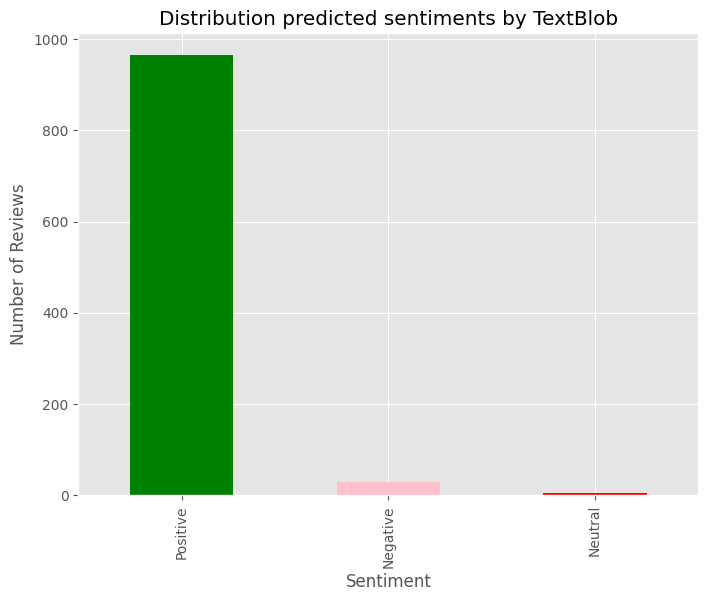

In [269]:
#sentiments predicted textblob plots
sentiment_counts = blob['predicted_textblob'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'pink', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution predicted sentiments by TextBlob')
plt.show()

# 7. VALIDATE THE RESULTS

VADERS VALIDATION

In [285]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

accuracy_score_vader = accuracy_score(vaders['sentiment'],vaders['predicted_vaders'])
print(f"VADERS Accuracy Score: {accuracy_score_vader}")

accuracy_score_textblob = accuracy_score(blob['sentiment'],blob['predicted_textblob'])
print(f"TEXTBLOB Accuracy Score: {accuracy_score_textblob}")

VADERS Accuracy Score: 0.959
TEXTBLOB Accuracy Score: 0.954


In [289]:
accuracy_score_vader = accuracy_score(vaders['sentiment'],vaders['predicted_vaders'])
print(f"VADERS Accuracy Score: {accuracy_score_vader}")
print("\n")
print("VADERS Classification Report")
print(classification_report(vaders['sentiment'],vaders['predicted_vaders']))

VADERS Accuracy Score: 0.959


VADERS Classification Report
              precision    recall  f1-score   support

    Negative       0.09      0.29      0.14         7
     Neutral       0.00      0.00      0.00        12
    Positive       0.99      0.98      0.98       981

    accuracy                           0.96      1000
   macro avg       0.36      0.42      0.37      1000
weighted avg       0.97      0.96      0.96      1000



In [288]:
accuracy_score_textblob = accuracy_score(blob['sentiment'],blob['predicted_textblob'])
print(f"TEXTBLOB Accuracy Score: {accuracy_score_textblob}")
print("\n")
print("TextBlob Classification Report")
print(classification_report(blob['sentiment'],blob['predicted_textblob']))

TEXTBLOB Accuracy Score: 0.954


TextBlob Classification Report
              precision    recall  f1-score   support

    Negative       0.10      0.43      0.16         7
     Neutral       0.00      0.00      0.00        12
    Positive       0.99      0.97      0.98       981

    accuracy                           0.95      1000
   macro avg       0.36      0.47      0.38      1000
weighted avg       0.97      0.95      0.96      1000

